In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.signal
import timeit

### What is factorial and a factorial algorithm?

Factorial is denoted with an ! mark in mathematics and can be summarised as the product of all positive integers from 1 to n or to multiply a number by every whole number smaller than itself between and inclusive of 1. For the purposes of this assignment three algorithms have been written to calculate the factorial of a given input and each will be explained and examined. 

### Calculating factorial with an iterative function.

The iterative algorithm uses a for loop to build up the answer starting with the lowest number of one and working up to the number itself.A base of 1 is given. The loop is then entered and each time it is entered this base is multiplied by the amount of times the loop has been used. For example if an input of three is given , the base will start at one, enter the loop and be multiplied by one. For the second loop this base will be multiplied by two and be returned as the product of one and two which is two. On the third time running the loop the base will be multiplied by three and be returned as the product of two and three which is six. The for loop will then stop, returning an answer of six which is the factorial of three. 

In [2]:
def  factorial_iterative(number):
    number1 = 0
    if number < 0:
        print("error number less than zero")
    else:
        fact = 1
        for i in range(1, number + 1):
            fact *= i
            number1 = fact

In [3]:
#np.arrange used to create a values array for plotting against the factorial times of the iterative function,
#starting at one, stopping at nine hundred and steeping in one. 900 was used to keep consistant with 
#recursive functions further down which also used 900.
values = np.arange(start=1, stop=900, step=1)

In [4]:
#A time factorial i array was made to store the times of the algorithm. A for loop was used to feed a range from
#one to nine hundred into the algorithm and a timer was started before and stopped after each time. 
#This number was multiplied by an order of ten to make it a more readable number as the original was stored in
#small fractions of a second. This was repeated five times with five seperate arrays storing five sets of data.

timeFactorial1i = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_iterative(i)
    stop = timeit.default_timer()
    time_function_1i = ((stop-start)*1000000000)
    timeFactorial1i.append(time_function_1i)

In [5]:
timeFactorial2i = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_iterative(i)
    stop = timeit.default_timer()
    time_function_2i = ((stop-start)*1000000000)
    timeFactorial2i.append(time_function_2i)

In [6]:
timeFactorial3i = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_iterative(i)
    stop = timeit.default_timer()
    time_function_3i = ((stop-start)*1000000000)
    timeFactorial3i.append(time_function_3i)

In [7]:
timeFactorial4i = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_iterative(i)
    stop = timeit.default_timer()
    time_function_4i = ((stop-start)*1000000000)
    timeFactorial4i.append(time_function_4i)

In [8]:
timeFactorial5i = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_iterative(i)
    stop = timeit.default_timer()
    time_function_5i = ((stop-start)*1000000000)
    timeFactorial5i.append(time_function_5i)

Text(0, 0.5, 'time')

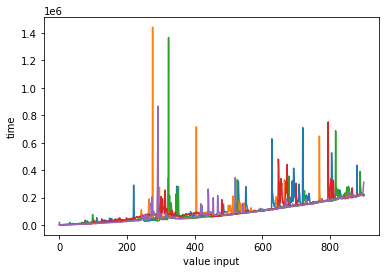

In [9]:
#All five data sets were plotted in the same graph to compare the inconsistencies in timing the same 
#algorithm with the same inputs with many spikes visible, however a trend also being apparent.

plt.plot(values, timeFactorial1i)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial2i)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial3i)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial4i)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial5i)
plt.xlabel('value input')
plt.ylabel('time')

Text(0, 0.5, 'time')

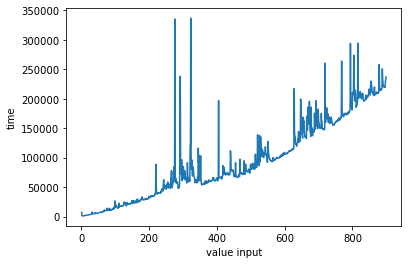

In [10]:
#All five arrays were combined to create an average data set. The average_int_i is also what is used as a data set for the 
#binary and linear search algorithm. The code for creating the averages of the arrays is based form a stack overflow 
#post-https://stackoverflow.com/questions/43436044/mean-value-of-each-element-in-multiple-lists-python.
#This average was then ploted.

iterative_avg = [timeFactorial1i, timeFactorial2i, timeFactorial3i,timeFactorial4i,timeFactorial5i]
arrays_iterative = [np.array(x) for x in iterative_avg]
average1 = [np.mean(k) for k in zip(*arrays_iterative)]
average_int_i = []
for i in average1:
    i = int(i)
    average_int_i.append(i)

plt.plot(values, average_int_i)
plt.xlabel('value input')
plt.ylabel('time')

Text(0, 0.5, 'time')

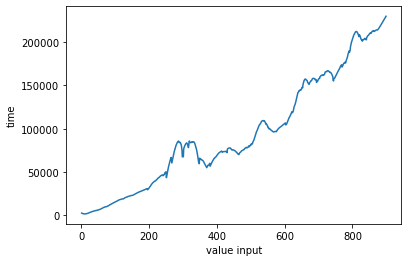

In [11]:
#savgol filter was used to provide another viewpoint of the data.

smoother1 = scipy.signal.savgol_filter(average1, 51, 3)
plt.plot(values, smoother1)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = -14002.601554305118            
b_1 = 241.79577010832105


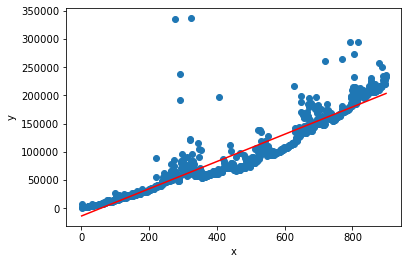

In [12]:
#The functions in this cell where taken form geeks for geeks website-
#https://www.geeksforgeeks.org/linear-regression-python-implementation/
#It is used to calculate the linear regression line of a set of data. This line and all of the data points were ploted 
# and printed out.

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values)
    y = np.array(average1)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [13]:
print("Input of 100: " , average1[100])
print("Input of 800: " , average1[800])
print("max time taken: " , max(average1))
print("min time taken: " , min(average1))
print("First time taken: " , average1[2])
print("Final time taken: " , average1[898])

Input of 100:  20440.000000032654
Input of 800:  206400.000000162
max time taken:  336740.00000001315
min time taken:  1159.9999999667432
First time taken:  1159.9999999667432
Final time taken:  236899.9999998067


The big O complexity is used to estimate the worst case of how long a function may run for an n input. The executed run time of this iterative function would be big O(n) as the for loop is the most expensive part of this algorithm and it is entered the same amount of times as the input. For example if the input is one the for loop will be entered once, if the input is 1000 the for loop will be entered 1000 times. For the example in the function above, the if statement to check if the number is greater takes time and memory, and itself will have a big O time complexity of Big O(1) as it will only run once regardless of input. However, this is not taken into account as the for loop has the potential to grow much larger and with a big enough input will make the time taken by this if statement trend towards 0 percent of the total time taken to complete. 

A big O(n) on graphing will resemble a straight line that is not parallel to either the x or y axis. This can be seen in both the average graph and with the linear regression line graph above. The slope of this line can be calculated in a more basic form to the linear regression line above by using the slope of a line formula and using rise over run (y1-y2)/(x1-x2). Using an observed coordinates pair from collected data the pair of (181919,800),(10219,100) can be used to calculate a slope of roughly 245 (181919 - 102190)/(800-100). This would indicate that for every increase of one unit in input or x axis, the y value would increase by 245 units.

The recorded maximum time taken was 387179 while the smallest was 839, however this times may be outliers due to computer performance. The first time taken (second time used as first time is the only value to include first if statement) was 920 and the final time taken was 220640 which can be seen as better representations of the best and worst case values due to the structure of the algorithm. 

-------------------------------------------------------------------------------------------------------------------------------

### Calculating factorial with a regular recursive function.

The regular recursive function to calculate the factorial of a number will first check if a number is zero or one. If so it will return a value of one as factorial one or factorial zero is equal to 1. Else the number will be multiplied by the function 
of the number minus one. This is how the function is recursive as it calls itself until the number minus 1 equals either zero or one and will then return 1 as was defined earlier and the function has hit a base case and can work up to solve itself. For example with an input of 3, 3 will be multiplied by function(2), which in itself is 2 times function(1). Once function(1) is hit this will return 1. Function(2) can now be solved as 2x1. function(3) can finally also be solved as 3 x 2 providing a final answer of six.


In [14]:
def factorial_regular_recursion(num):
        if num == 1 or num==0:
            return 1
        else:
            return num * factorial_regular_recursion(num-1)       

The data and graphs were collected,averaged and drawn in the same manner as the above iterative function. All referenced code from above that appears below is reused from the same websites.

In [15]:
#A time factorial rr array was made to store the times of the algorithm. A for loop was used to feed a range from
#one to nine hundred into the algorithm and a timer was started before and stopped after each time. 
#This number was multiplied by an order of ten to make it a more readable number as the original was stored in
#small fractions of a second. This was repeated five times with five seperate arrays storing five sets of data.

timeFactorial1rr = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_regular_recursion(i)
    stop = timeit.default_timer()
    time_function_1rr = ((stop-start)*1000000000)
    timeFactorial1rr.append(time_function_1rr)

In [16]:
timeFactorial2rr = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_regular_recursion(i)
    stop = timeit.default_timer()
    time_function_2rr = ((stop-start)*1000000000)
    timeFactorial2rr.append(time_function_2rr)

In [17]:
timeFactorial3rr = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_regular_recursion(i)
    stop = timeit.default_timer()
    time_function_3rr = ((stop-start)*1000000000)
    timeFactorial3rr.append(time_function_3rr)

In [18]:
timeFactorial4rr = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_regular_recursion(i)
    stop = timeit.default_timer()
    time_function_4rr = ((stop-start)*1000000000)
    timeFactorial4rr.append(time_function_4rr)

In [19]:
timeFactorial5rr = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_regular_recursion(i)
    stop = timeit.default_timer()
    time_function_5rr = ((stop-start)*1000000000)
    timeFactorial5rr.append(time_function_5rr)

Text(0, 0.5, 'time')

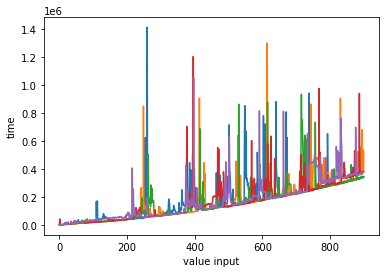

In [20]:
#All five data sets were plotted in the same graph to compare the inconsistencies in timing the same 
#algorithm with the same inputs with many spikes visible, however a trend also being apparent.

plt.plot(values, timeFactorial1rr)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial2rr)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial3rr)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial4rr)
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values, timeFactorial5rr)
plt.xlabel('value input')
plt.ylabel('time')

Text(0, 0.5, 'time')

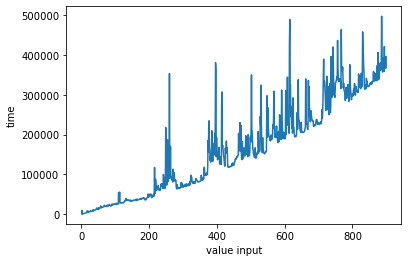

In [21]:
#All five arrays were combined to create an average data set. The average_int_i is also what is used as a data set for the 
#binary and linear search algorithm. The code for creating the averages of the arrays is based form a stack overflow 
#post-https://stackoverflow.com/questions/43436044/mean-value-of-each-element-in-multiple-lists-python.
#This average was then ploted.

recursive_r_avg = [timeFactorial1rr, timeFactorial2rr, timeFactorial3rr,timeFactorial4rr,timeFactorial5rr]
arrays_rr = [np.array(x) for x in recursive_r_avg]
average2 = [np.mean(k) for k in zip(*arrays_rr)]
average_int_rr = []
for i in average2:
    i = int(i)
    average_int_rr.append(i)

plt.plot(values, average_int_rr)
plt.xlabel('value input')
plt.ylabel('time')

Text(0, 0.5, 'time')

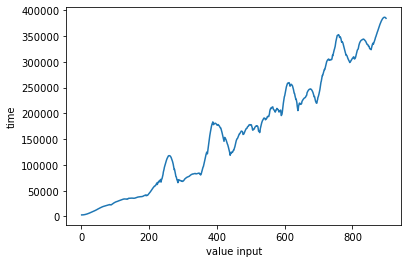

In [22]:
#savgol filter was used to provide another viewpoint of the data.

smoother2 = scipy.signal.savgol_filter(average2, 51, 3)
plt.plot(values, smoother2)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = -26532.687742626673            
b_1 = 422.7454363629433


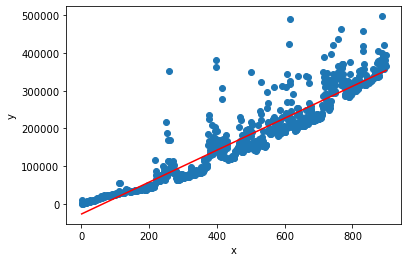

In [23]:
#The functions in this cell where taken form geeks for geeks website-
#https://www.geeksforgeeks.org/linear-regression-python-implementation/
#It is used to calculate the linear regression line of a set of data. This line and all of the data points were ploted 
# and printed out.

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values)
    y = np.array(average2)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [24]:
print("Input of 100: " , average2[100])
print("Input of 800: " , average2[800])
print("max time taken: " , max(average2))
print("min time taken: " , min(average2))
print("First time taken: " , average2[2])
print("Final time taken: " , average2[898])

Input of 100:  25979.999999936605
Input of 800:  296500.00000014383
max time taken:  496960.0000000796
min time taken:  1100.000000064938
First time taken:  1159.9999998779253
Final time taken:  395579.99999999534


The executed run time of this recursive function would be big O(n) as the algorithm will call itself whatever amount of times is equal to the input. Again similar to the iterative function there are other processes that take time and memory, however these are not included in the big o time complexity as they will trend towards zero percent for a big enough input. 

A big O(n) on graphing will resemble a straight line that is not parallel to either the x or y axis. This can be seen in both the average graph and with the linear regression line graph above. The slope of this line can be calculated in a more basic form to the linear regression line above by using the slope of a line formula and using rise over run (y1-y2)/(x1-x2). Using an observed coordinates pair from collected data the pair of (403500,800),(25839,100) can be used to calculate a slope of roughly 539 (403500 - 25839)/(800-100). This would indicate that for every increase of one unit in input or x axis, the y value would increase by 539 units. This would indicate that compared to the iterative function the regular recursive function is fair less efficient than the iterative function which only had a rise of 245 per unit. 

The recorded maximum time taken was 567619 while the smallest was 1040, however this times may be outliers due to computer performance. The first time taken (second time used as first time is the only value to include first if statement) was 1040 and the final time taken was 483480 which can be seen as better representations of the best and worst case values due to the structure of the algorithm. These again show how much more efficient the iterative function is. While for the best case the times are similar between both, the recorded worst case for the last element was over twice as long in the recursive as in the iterative corresponding to the difference in y value increase per unit. 

-------------------------------------------------------------------------------------------------------------------------------

### Calculating factorial with a tail recursive function.

The tail recursive function to calculate factorial is similar to the regular recursive function except for some slight differences. The tail recursive function takes the input but also uses an accumulator. This accumulator saves space when computing the algorithm for example when computing factorial 3, 3 will not equal 1 so then the function (n-1 or 2, 3*1) is returned. As 2 is not equal to 1 then the function(n-1 or 1 , 3*2) is returned. Once one is hit the accumulator of 3*2 is return as an answer of 6.

In [25]:
def factorial_tail_recursion(num, acc=1):
        if num == 0:
            return acc
        return factorial_tail_recursion(num - 1, num * acc)

The data and graphs were collected,averaged and drawn in the same manner as the above iterative and regular recursive  functions. All referenced code from above that appears below is reused from the same websites.

In [26]:
timeFactorial1_tail = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_tail_recursion(i)
    stop = timeit.default_timer()
    time_function_1tail = ((stop-start)*1000000000)
    timeFactorial1_tail.append(time_function_1tail)

In [27]:
timeFactorial2_tail = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_tail_recursion(i)
    stop = timeit.default_timer()
    time_function_2tail = ((stop-start)*1000000000)
    timeFactorial2_tail.append(time_function_2tail)

In [28]:
timeFactorial3_tail = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_tail_recursion(i)
    stop = timeit.default_timer()
    time_function_3tail = ((stop-start)*1000000000)
    timeFactorial3_tail.append(time_function_3tail)

In [29]:
timeFactorial4_tail = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_tail_recursion(i)
    stop = timeit.default_timer()
    time_function_4tail = ((stop-start)*1000000000)
    timeFactorial4_tail.append(time_function_4tail)

In [30]:
timeFactorial5_tail = []
for i in range(1,900,1):
    start = timeit.default_timer()
    factorial_tail_recursion(i)
    stop = timeit.default_timer()
    time_function_5tail = ((stop-start)*1000000000)
    timeFactorial5_tail.append(time_function_5tail)


Text(0, 0.5, 'time')

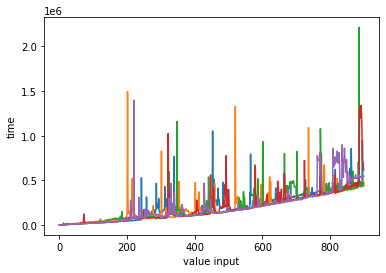

In [31]:
plt.plot(values,timeFactorial1_tail )
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values,timeFactorial2_tail )
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values,timeFactorial3_tail )
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values,timeFactorial4_tail )
plt.xlabel('value input')
plt.ylabel('time')

plt.plot(values,timeFactorial5_tail )
plt.xlabel('value input')
plt.ylabel('time')

Text(0, 0.5, 'time')

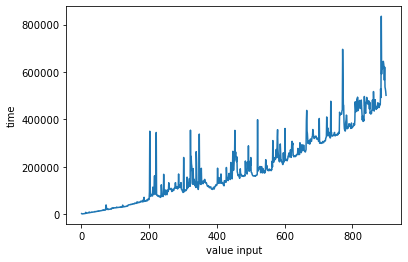

In [32]:
recursive_tail_avg = [timeFactorial1_tail, timeFactorial2_tail, timeFactorial3_tail,timeFactorial4_tail,timeFactorial5_tail]
arrays_tail = [np.array(x) for x in recursive_tail_avg]
average3 = [np.mean(k) for k in zip(*arrays_tail)]
average_int_tail=[]
for i in average3:
    i = int(i)
    average_int_tail.append(i)

plt.plot(values, average_int_tail)
plt.xlabel('value input')
plt.ylabel('time')

Text(0, 0.5, 'time')

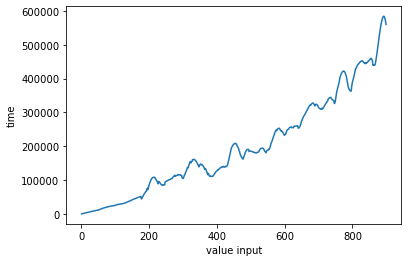

In [33]:
smoother3 = scipy.signal.savgol_filter(average3, 51, 3)
plt.plot(values, smoother3)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = -42820.231090717134            
b_1 = 536.543141145853


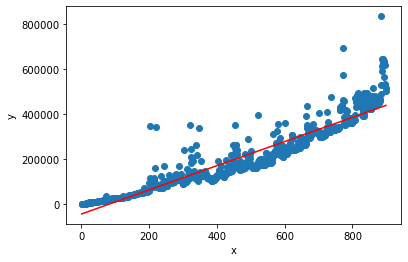

In [34]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values)
    y = np.array(average3)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [35]:
print("Input of 100: " , average3[100])
print("Input of 800: " , average3[800])
print("max time taken: " , max(average3))
print("min time taken: " , min(average3))
print("First time taken: " , average3[2])
print("Final time taken: " , average3[898])

Input of 100:  26579.99999975402
Input of 800:  369500.0000000448
max time taken:  835179.9999998023
min time taken:  1060.000000130401
First time taken:  1060.000000130401
Final time taken:  501620.0000000026


The executed run time of this iterative function would be big O(n) as the algorithm will call itself whatever amount of times is equal to the input. Again similar to the iterative  and regular recursive functions there are other processes that take time and memory, however these are not included in the big o time complexity as they will trend towards zero percent for a big enough input. 

A big O(n) on graphing will resemble a straight line that is not parallel to either the x or y axis. This can be seen in both the average graph and with the linear regression line graph above. The slope of this line can be calculated in a more basic form to the linear regression line above by using the slope of a line formula and using rise over run (y1-y2)/(x1-x2). Using an observed coordinates pair from collected data the pair of (409720,800),(29639,100) can be used to calculate a slope of roughly 539 (409720 - 29639)/(800-100). This would indicate that for every increase of one unit in input or x axis, the y value would increase by 542 units. This would indicate that compared to the iterative function the regular recursive function is fair less efficient than the iterative function which only had a rise of 245 per unit, however it is seen to compare very closely to the regular recursive function at 539.

The recorded maximum time taken was 735260 while the smallest was 1320, however this times may be outliers due to computer performance. The first time taken (second time used as first time is the only value to include first if statement) was 1199 and the final time taken was 528599 which can be seen as better representations of the best and worst case values due to the structure of the algorithm. These again show how much more efficient the iterative function is. While for the best case the times are similar between both, the recorded worst case for the last element was over twice as long in the recursive as in the iterative corresponding to the difference in y value increase per unit. Also the tail recursive and regular recursive functions are seen to preform similarly to each other with the regular recursive function performing slightly better on time, however using more memory.

-------------------------------------------------------------------------------------------------------------------------------

### Linear search

A linear search is a way to find an element by simply checking each element starting with the first and finishing when the desired element is found by checking each element in between. It is known as being simple to implement however is also not seen as as quick or efficient compared other methods due to the fact that the worst case will have to check every element before finding the desired one.


In [36]:
def search(average_int_i, x):
  
    for i in range(len(average_int_i)):
  
        if average_int_i[i] == x:
            return i
  
    return -1


In [37]:
linear_search_times = []
for i in range(1,899,1):
    start = timeit.default_timer()
    search(average_int_i, average_int_i[i])
    stop = timeit.default_timer()
    linear_time = ((stop-start)*1000000000)
    linear_search_times.append(linear_time )
  

Text(0, 0.5, 'time')

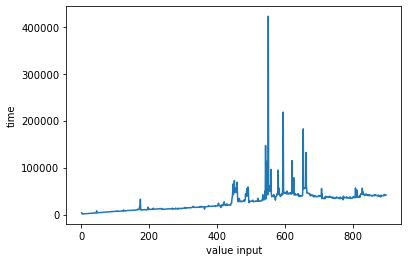

In [38]:
values_for_linear = np.arange(start=1, stop=899, step=1)


plt.plot(values_for_linear, linear_search_times )
plt.xlabel('value input')
plt.ylabel('time')


Estimated coefficients:
b_0 = 2226.4869535374855            
b_1 = 55.253956303124404


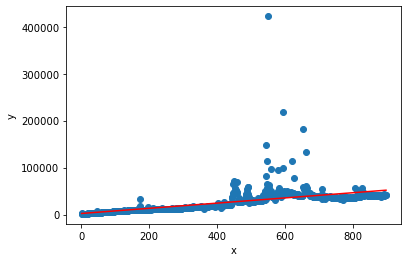

In [39]:


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values_for_linear)
    y = np.array(linear_search_times)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [40]:
linear_search_times2 = []
for i in range(1,100,1):
    start = timeit.default_timer()
    search(average_int_i, average_int_i[i])
    stop = timeit.default_timer()
    linear_time2 = ((stop-start)*1000000000)
    linear_search_times2.append(linear_time2 )

Text(0, 0.5, 'time')

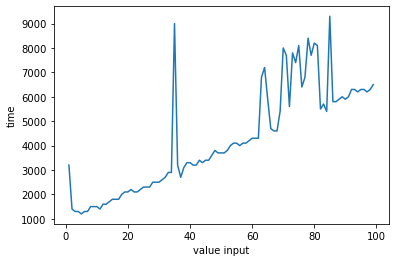

In [41]:
values_for_linear2 = np.arange(start=1, stop=100, step=1)


plt.plot(values_for_linear2, linear_search_times2 )
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = 964.8526076638109            
b_1 = 64.92517006900164


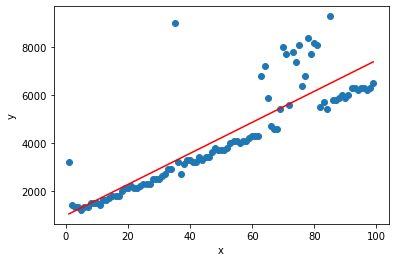

In [42]:


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values_for_linear2)
    y = np.array(linear_search_times2)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [43]:
linear_search_times3 = []
for i in range(1,500,1):
    start = timeit.default_timer()
    search(average_int_i, average_int_i[i])
    stop = timeit.default_timer()
    linear_time3 = ((stop-start)*1000000000)
    linear_search_times3.append(linear_time3 )

Text(0, 0.5, 'time')

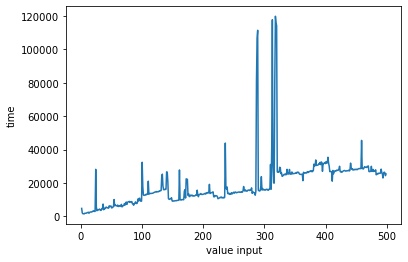

In [44]:
values_for_linear3 = np.arange(start=1, stop=500, step=1)


plt.plot(values_for_linear3, linear_search_times3)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = 4431.429123296461            
b_1 = 58.613361663067245


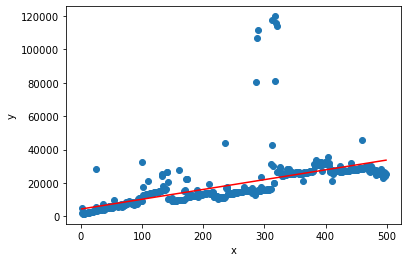

In [45]:


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values_for_linear3)
    y = np.array(linear_search_times3)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [46]:
print("linear search range 1 to 899")
print("Input of 100: " , linear_search_times[100])
print("Input of 800: " , linear_search_times[800])
print("max time taken: " , max(linear_search_times))
print("min time taken: " , min(linear_search_times))
print("First time taken: " , linear_search_times[2])
print("Final time taken: " , linear_search_times[897])

linear search range 1 to 899
Input of 100:  6799.999999529405
Input of 800:  38099.99999937475
max time taken:  422399.9999997119
min time taken:  1300.0000000928935
First time taken:  1300.0000000928935
Final time taken:  41500.00000002763


In [47]:
print("linear search range 1 to 100")
print("Input of 10: " , linear_search_times2[10])
print("Input of 80: " ,linear_search_times2[80])
print("max time taken: " , max(linear_search_times2))
print("min time taken: " , min(linear_search_times2))
print("First time taken: " , linear_search_times2[2])
print("Final time taken: " , linear_search_times2[98])

linear search range 1 to 100
Input of 10:  1400.0000003733248
Input of 80:  8099.999999622298
max time taken:  9300.00000032294
min time taken:  1200.0000007006406
First time taken:  1300.0000000928935
Final time taken:  6499.999999576289


In [48]:
print("linear search range 1 to 500")
print("Input of 50: " , linear_search_times3[50])
print("Input of 400: " ,linear_search_times3[400])
print("max time taken: " , max(linear_search_times3))
print("min time taken: " , min(linear_search_times3))
print("First time taken: " , linear_search_times3[2])
print("Final time taken: " , linear_search_times3[497])

linear search range 1 to 500
Input of 50:  5200.000000371574
Input of 400:  32799.99999961092
max time taken:  119800.00000022528
min time taken:  1500.0000006537562
First time taken:  1600.000000046009
Final time taken:  24400.000000035503


The linear search can be seen to follow a big O(n) as the worst case is dictated by the number given as an input as this is the number of elements that need to be checked. For 1 to 900 the minimum or bets case was 799 while the worst was 41099, for 1 to 100 best case was 1400 and worst was 5100 and finally for 1 to 500 best was 799 and worst was 22500. These functions can be seen to scale consistently as the slope of each is very similar and varies due to computer performance and to potential slight inaccuracy in values chosen. For 1 to 900 (35300-500)/(800-100) = a slope of 43, for 1 to 100 (4300 - 2100)/(80-10) = a slope of 59 and for 1 to 500 (23700-2800)/(400-50) = a slope of 59. This demonstrates that regardless of input a rise of somewhere in the region of 40 y units can be expected for every increase of x by one unit.

-------------------------------------------------------------------------------------------------------------------------------

### Binary Search

A binary search requires a sorted list, however has a better worst case than that of a linear search and it will never has to check every element to find the answer. It will check the middle value, if the middle value is the correct number it will return this as its best case, ortherwise if the taregt is smaller than the middle value it will check to the left from the first to the middle values middle point or if higher it will check the middle point between middle and end point. This process continues having the size of the required search area half each time until the desired answer is found. 

In [49]:
average_int_i_sorted = sorted(average_int_i)

In [50]:
#code for binary search adapted from geeks for geeks -https://www.geeksforgeeks.org/binary-search/
def binarySearch(arr, l, r, x):

    while l <= r:

        mid = l + (r - l) // 2

        # Check if x is present at mid
        if arr[mid] == x:
            return mid

        # If x is greater, ignore left half
        elif arr[mid] < x:
            l = mid + 1

        # If x is smaller, ignore right half
        else:
            r = mid - 1

    # If we reach here, then the element
    # was not present
    return -1

In [51]:
iterative_binary_search_times = []
for i in range(1,899,1):
    start = timeit.default_timer()
    binarySearch(average_int_i_sorted, 0, len(average_int_i_sorted)-1, average_int_i_sorted[i])
    stop = timeit.default_timer()
    iterative_binary_time = ((stop-start)*1000000000)
    iterative_binary_search_times.append(iterative_binary_time)

Text(0, 0.5, 'time')

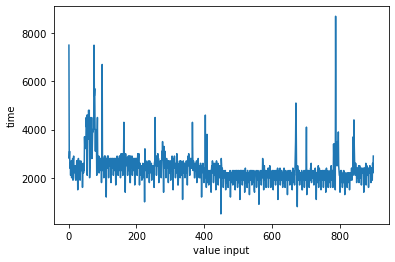

In [52]:
values_for_binary1 = np.arange(start=1, stop=899, step=1)
plt.plot(values_for_binary1,iterative_binary_search_times)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = 2767.7119722577513            
b_1 = -0.8678421485954684


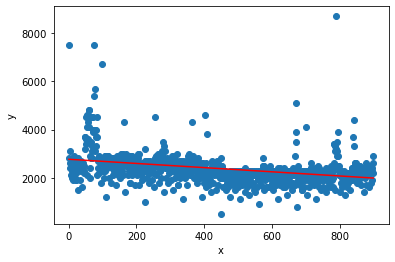

In [53]:


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values_for_binary1)
    y = np.array(iterative_binary_search_times)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [54]:
iterative_binary_search_times2 = []
for i in range(1,100,1):
    start = timeit.default_timer()
    binarySearch(average_int_i_sorted, 0, len(average_int_i_sorted)-1, average_int_i_sorted[i])
    stop = timeit.default_timer()
    iterative_binary_time2 = ((stop-start)*1000000000)
    iterative_binary_search_times2.append(iterative_binary_time2)

Text(0, 0.5, 'time')

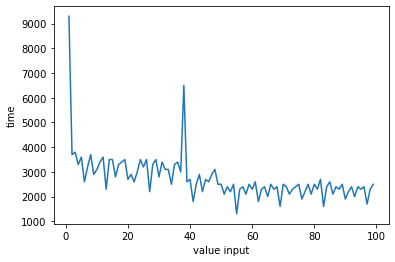

In [55]:
values_for_binary2 = np.arange(start=1, stop=100, step=1)
plt.plot(values_for_binary2,iterative_binary_search_times2)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = 3637.8272522282246            
b_1 = -17.928262215400334


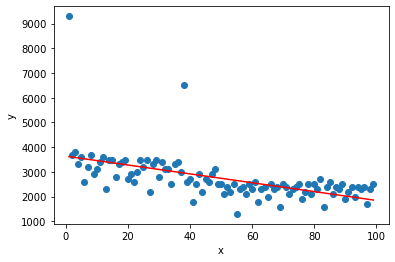

In [56]:


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values_for_binary2)
    y = np.array(iterative_binary_search_times2)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [57]:
iterative_binary_search_times3 = []
for i in range(1,500,1):
    start = timeit.default_timer()
    binarySearch(average_int_i_sorted, 0, len(average_int_i_sorted)-1, average_int_i_sorted[i])
    stop = timeit.default_timer()
    iterative_binary_time3 = ((stop-start)*1000000000)
    iterative_binary_search_times3.append(iterative_binary_time3)

Text(0, 0.5, 'time')

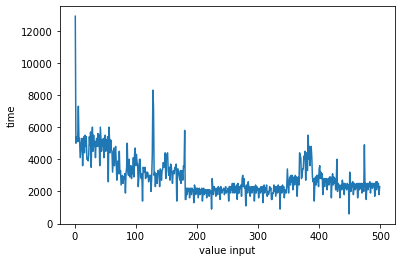

In [58]:
values_for_binary3 = np.arange(start=1, stop=500, step=1)
plt.plot(values_for_binary3,iterative_binary_search_times3)
plt.xlabel('value input')
plt.ylabel('time')

Estimated coefficients:
b_0 = 4043.569065979618            
b_1 = -4.481290291841699


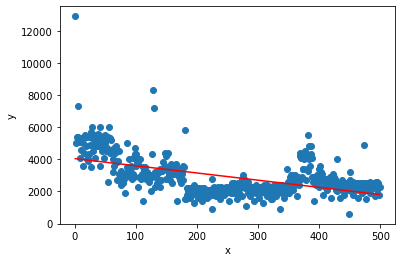

In [59]:


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y,)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "r")
 
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(values_for_binary3)
    y = np.array(iterative_binary_search_times3)
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

In [60]:
print("linear search range 1 to 899")
print("Input of 100: " , iterative_binary_search_times[100])
print("Input of 800: " , iterative_binary_search_times[800])
print("max time taken: " , max(iterative_binary_search_times))
print("min time taken: " , min(iterative_binary_search_times))
print("First time taken: " , iterative_binary_search_times[2])
print("Final time taken: " , iterative_binary_search_times[897])

linear search range 1 to 899
Input of 100:  2800.0000007466497
Input of 800:  2099.999999671809
max time taken:  8700.000000416709
min time taken:  500.0000005139782
First time taken:  3099.9999989234084
Final time taken:  2900.0000001389026


In [61]:
print("linear search range 1 to 500")
print("Input of 50: " , iterative_binary_search_times3[50])
print("Input of 400: " ,iterative_binary_search_times3[400])
print("max time taken: " , max(iterative_binary_search_times3))
print("min time taken: " , min(iterative_binary_search_times3))
print("First time taken: " , iterative_binary_search_times3[2])
print("Final time taken: " , iterative_binary_search_times3[497])

linear search range 1 to 500
Input of 50:  4500.00000107309
Input of 400:  3599.9999994373866
max time taken:  12899.999999760326
min time taken:  599.9999999062311
First time taken:  5399.99999915608
Final time taken:  1799.9999997186933


In [62]:
print("linear search range 1 to 100")
print("Input of 10: " , iterative_binary_search_times2[10])
print("Input of 80: " ,iterative_binary_search_times2[80])
print("max time taken: " , max(iterative_binary_search_times2))
print("min time taken: " , min(iterative_binary_search_times2))
print("First time taken: " , iterative_binary_search_times2[2])
print("Final time taken: " , iterative_binary_search_times2[98])

linear search range 1 to 100
Input of 10:  3400.0000006528808
Input of 80:  2300.0000002326715
max time taken:  9300.00000032294
min time taken:  1300.000000981072
First time taken:  3799.999999998249
Final time taken:  2500.000000793534


An iterative binary search can be seen to have a big O(1) as it can be seen to follow a line approximately parallel to the x axis graphed above meaning that regardless of input the time taken should be similar for a given array. While each element will be similar in time taken, the addition of extra elements to the array will increase the average time taken to find the desired element. While the rise over run of both 1 to 900(2099-55990/(800-100) = -59 and 1 to 100 (3599 -2099)/(80-10) = 21 would seem to contradict each other this can be put down again to inaccuracy and computer performance. However, in the case of 1 to 500 (2300-1900)/(400-50) = 1.14 gives the best representation of expected big O as in theory the line should have a slope pf zero.

Unlike a linear search algorithm the first and last elements will not be the best and worst cases and should preform similarly to each other which can be seen in the case of 1 to 100 when 2900 and 2800 were recorded. The best case will be the value directly in the middle of the search area and the worst case will depend on the size of the array.